In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(210240, 16)

In [5]:
df1=df[:10000]

In [4]:
df.head(10)

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,01-01-2019 00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,01-01-2019 00:10,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,01-01-2019 00:20,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,01-01-2019 00:30,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,01-01-2019 00:40,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
5,01-01-2019 00:50,11.6,6.9,0.21,1005,128,1.0,0,0,0,0,0.258,1,162.89,1.3,72.87
6,01-01-2019 01:00,11.4,6.9,0.21,1005,129,1.0,0,0,0,0,0.258,1,160.63,1.3,73.83
7,01-01-2019 01:10,11.3,6.9,0.21,1005,131,1.0,0,0,0,0,0.258,1,158.38,1.3,74.32
8,01-01-2019 01:20,11.1,6.9,0.21,1005,133,1.0,0,0,0,0,0.258,1,156.12,1.3,75.31
9,01-01-2019 01:30,10.9,6.9,0.21,1004,135,1.1,0,0,0,0,0.258,1,153.87,1.3,76.24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [ ]:
df.isna().sum()

Timestamp             0
Temperature           0
Dew Point             0
Surface Albedo        0
Pressure              0
Wind Direction        0
Wind Speed            0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Fill Flag             0
Ozone                 0
Cloud Type            0
Solar Zenith Angle    0
Precipitable Water    0
Relative Humidity     0
dtype: int64

In [ ]:
df.describe()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,26.795495,13.447805,0.211623,996.856141,209.095453,1.918037,96.720681,225.098992,249.938537,0.288699,0.268813,2.513604,89.745758,3.377582,53.364443
std,8.639162,10.234861,0.020889,7.226820,101.616108,1.194954,120.334380,277.920322,325.049751,1.052178,0.015632,3.093565,42.852632,2.261960,29.692608
min,1.000000,-12.400000,0.170000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217000,0.000000,2.210000,0.300000,4.100000
25%,20.800000,4.900000,0.200000,990.000000,109.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.259000,0.000000,53.140000,1.500000,25.540000
50%,27.300000,13.100000,0.200000,997.000000,248.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.270000,1.000000,89.400000,2.500000,51.210000
75%,32.200000,24.400000,0.230000,1003.000000,293.000000,2.500000,194.000000,486.000000,533.000000,0.000000,0.279000,6.000000,126.440000,5.700000,80.820000
max,48.900000,29.100000,0.260000,1013.000000,360.000000,9.500000,603.000000,1008.000000,1053.000000,5.000000,0.351000,9.000000,177.950000,8.900000,100.000000


In [ ]:
df_corr = df[['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity']].corr()
df_corr

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
Temperature,1.000000,0.292697,0.596618,-0.714592,-0.046816,0.425250,0.523057,0.472487,0.540238,0.100625,0.553733,0.120401,-0.564038,0.411293,-0.356118
Dew Point,0.292697,1.000000,0.125001,-0.600056,-0.289789,0.083232,0.043487,0.011840,0.050812,0.146825,0.094705,0.542090,-0.108148,0.886361,0.749485
Surface Albedo,0.596618,0.125001,1.000000,-0.602828,-0.061984,0.326732,0.136141,0.029014,0.107675,0.064981,0.503839,0.096972,-0.165791,0.244229,-0.291906
Pressure,-0.714592,-0.600056,-0.602828,1.000000,0.192014,-0.341160,-0.097864,-0.063085,-0.124399,-0.127516,-0.518967,-0.426431,0.191856,-0.747911,-0.117146
Wind Direction,-0.046816,-0.289789,-0.061984,0.192014,1.000000,0.058592,0.115629,0.109398,0.100807,-0.068953,-0.061794,-0.218748,-0.097539,-0.295537,-0.214892
Wind Speed,0.425250,0.083232,0.326732,-0.341160,0.058592,1.000000,0.399801,0.458944,0.460741,0.059929,0.219860,0.076861,-0.447351,0.200612,-0.181200
Clearsky DHI,0.523057,0.043487,0.136141,-0.097864,0.115629,0.399801,1.000000,0.815847,0.911380,0.091770,0.096284,-0.048283,-0.860908,0.073124,-0.309436
Clearsky DNI,0.472487,0.011840,0.029014,-0.063085,0.109398,0.458944,0.815847,1.000000,0.949100,0.030883,0.044115,-0.050852,-0.864169,0.073328,-0.286987
Clearsky GHI,0.540238,0.050812,0.107675,-0.124399,0.100807,0.460741,0.911380,0.949100,1.000000,0.019399,0.097225,-0.030714,-0.887432,0.109841,-0.297871
Fill Flag,0.100625,0.146825,0.064981,-0.127516,-0.068953,0.059929,0.091770,0.030883,0.019399,1.000000,0.042986,0.269170,-0.131498,0.170982,0.065697


In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

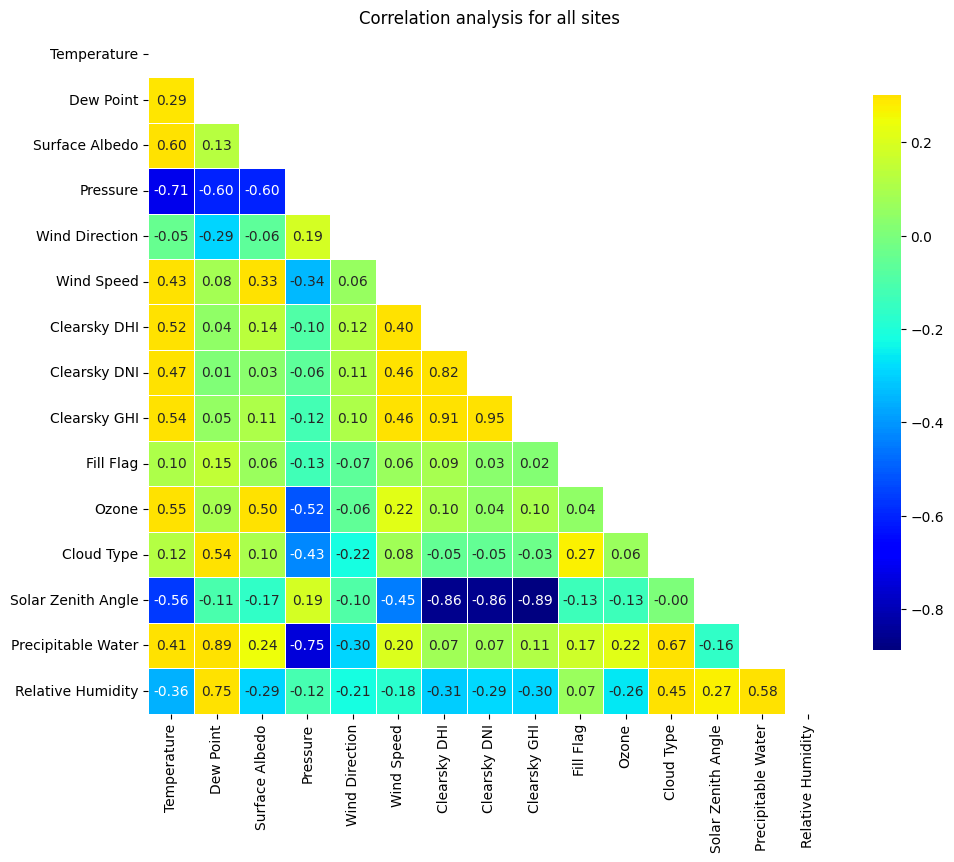

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

In [ ]:
#Feature Selection

In [7]:
selected_columns = ['Temperature', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Ozone',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity']


df_processed = df[selected_columns].reset_index(drop=True)

In [8]:
df_processed.head(10)

,Temperature,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Ozone,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,12.5,0.21,1005,121,1.0,0,0,0,0.258,173.92,1.4,68.82
1,12.3,0.21,1005,122,1.0,0,0,0,0.258,171.79,1.3,69.73
2,12.1,0.21,1005,124,1.0,0,0,0,0.258,169.59,1.3,70.65
3,12.0,0.21,1005,125,1.0,0,0,0,0.258,167.37,1.3,71.11
4,11.8,0.21,1005,126,1.0,0,0,0,0.258,165.13,1.3,71.91
5,11.6,0.21,1005,128,1.0,0,0,0,0.258,162.89,1.3,72.87
6,11.4,0.21,1005,129,1.0,0,0,0,0.258,160.63,1.3,73.83
7,11.3,0.21,1005,131,1.0,0,0,0,0.258,158.38,1.3,74.32
8,11.1,0.21,1005,133,1.0,0,0,0,0.258,156.12,1.3,75.31
9,10.9,0.21,1004,135,1.1,0,0,0,0.258,153.87,1.3,76.24


In [9]:
#target values
target_label = ['Clearsky DHI','Clearsky GHI','Clearsky DNI']

input_features = list(set(selected_columns).difference(set(target_label)))
input_features

['Relative Humidity',
 'Wind Speed',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Pressure',
 'Ozone',
 'Precipitable Water',
 'Wind Direction',
 'Temperature']

In [10]:
df_X = df_processed[input_features].reset_index(drop=True)
df_y = df_processed[target_label]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)

(168192, 9) (168192, 3)


In [13]:
print(X_test.shape, y_test.shape)

(42048, 9) (42048, 3)


In [14]:
poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
print(X_test_transformed)

[[1.00000e+00 1.00000e+02 1.20000e+00 ... 2.10250e+04 3.87150e+03
  7.12890e+02]
 [1.00000e+00 9.80600e+01 2.60000e+00 ... 6.00250e+04 6.59050e+03
  7.23610e+02]
 [1.00000e+00 5.60000e+01 1.30000e+00 ... 6.25000e+02 8.10000e+02
  1.04976e+03]
 ...
 [1.00000e+00 9.87000e+01 2.60000e+00 ... 7.07560e+04 4.33580e+03
  2.65690e+02]
 [1.00000e+00 8.20900e+01 3.10000e+00 ... 7.18240e+04 8.25440e+03
  9.48640e+02]
 [1.00000e+00 1.46700e+01 1.20000e+00 ... 8.23690e+04 7.94990e+03
  7.67290e+02]]


In [15]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 9
Ouput 55
Powers
 [[0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]
 [2 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1]
 [0 2 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0

In [16]:
X_transformed.shape

(168192, 55)

In [17]:
lr = LinearRegression()
lr.fit(X_transformed,y_train)

LinearRegression()

In [18]:
y_predicted = lr.predict(X_test_transformed)
print(y_predicted)

[[  6.6840532   21.86795242  74.07930085]
 [ 38.59023192 109.58711798 146.00375426]
 [ -6.34499727 -29.38945288 -52.64642824]
 ...
 [ 57.16470213  99.25607559 118.80058995]
 [291.05530343 873.29872369 712.32664318]
 [277.33294695 710.4576258  599.69792005]]


In [19]:
r2_score(y_test,y_predicted)

0.9028948943394938

In [26]:
y1_new=[]
for i in range(len(y_predicted)):
    y1_new.append(y_predicted[i][0])
print(y1_new)

[230.5733725009486, 245.07572590687778, 17.09871492907405, -4.626603782759048, 222.29924753552768, 5.322612084564753, 19.826136151561514, -11.98604530619923, -25.502584710135125, -9.757520789746195, -0.04894664394669235, 15.257047025836073, 146.42820796591695, 25.054297340568155, 9.745032907812856, 1.9522364881122485, -9.027436281670816, -5.7052556881681085, -9.14420503762085, 119.53775417106226, 50.607658469467424, 174.81801208981778, -5.942701098159887, -30.44744214147795, 139.74007553351112, -22.05615821480751, 144.91309025965165, 43.04009368142579, 37.44857321365271, 241.98253155266866, -17.414006476756185, 285.2711813893402, -26.37169488251675, 156.55060519801918, -12.094988349592313, -22.4084597856272, -11.469265940017067, 26.258350635296665, 199.33635300642345, 2.9745298402849585, 248.4409615881741, -4.842571103130467, -10.545894925133325, 219.64889681374189, 87.00306665350217, 28.077558618504554, 198.28623409383, -12.798358391970396, 19.311652374686673, 34.75300135242287, -21.1

In [27]:
y_test1_new=y_test['Clearsky DHI']

In [28]:
y_test1_new

6252    213
4684    294
1731      0
4742      0
4521    237
       ... 
6412    273
8285    241
7853    136
1095    207
6929      0
Name: Clearsky DHI, Length: 2000, dtype: int64

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_test1_new, y1_new)

805.6481695894198

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:












y_pred

array([[210, 648, 659],
       [288, 649, 520],
       [  0,   0,   0],
       ...,
       [136, 881, 939],
       [218, 385, 353],
       [  0,   0,   0]], dtype=int64)

In [ ]:
y1=[]
for i in range(len(y_pred)):
    y1.append(y_pred[i][0])
print(y1)

[210, 288, 0, 0, 231, 0, 0, 0, 0, 0, 0, 0, 179, 0, 0, 0, 0, 0, 0, 173, 19, 184, 0, 0, 133, 0, 168, 0, 0, 243, 0, 317, 0, 145, 0, 0, 0, 0, 241, 0, 293, 0, 0, 218, 48, 5, 205, 0, 0, 0, 0, 252, 104, 211, 0, 0, 0, 0, 91, 0, 0, 111, 0, 0, 0, 0, 0, 8, 22, 0, 0, 249, 0, 0, 134, 0, 0, 434, 228, 0, 0, 169, 0, 0, 55, 0, 0, 0, 245, 0, 114, 0, 0, 120, 0, 70, 0, 102, 91, 0, 78, 0, 0, 0, 301, 0, 0, 139, 179, 0, 187, 0, 0, 0, 226, 0, 0, 93, 28, 9, 0, 22, 0, 282, 0, 229, 179, 143, 249, 231, 45, 63, 271, 0, 0, 258, 40, 370, 220, 0, 0, 0, 0, 0, 0, 338, 183, 225, 115, 0, 28, 0, 253, 186, 200, 0, 0, 0, 229, 281, 0, 0, 0, 0, 180, 0, 0, 0, 77, 323, 0, 239, 0, 0, 291, 0, 0, 12, 157, 0, 0, 209, 189, 0, 0, 0, 108, 0, 204, 0, 191, 0, 149, 0, 0, 208, 0, 0, 0, 0, 0, 196, 0, 97, 0, 184, 0, 212, 0, 0, 268, 0, 0, 0, 0, 0, 0, 0, 0, 0, 141, 237, 0, 69, 0, 0, 163, 0, 0, 203, 120, 0, 0, 15, 218, 0, 0, 114, 0, 0, 0, 78, 257, 0, 161, 220, 0, 92, 0, 205, 81, 142, 287, 0, 0, 0, 182, 222, 0, 198, 0, 0, 0, 247, 0, 177, 0, 112

In [ ]:
y_test1=y_test['Clearsky DHI']

In [ ]:
y_test1

6252    213
4684    294
1731      0
4742      0
4521    237
       ... 
6412    273
8285    241
7853    136
1095    207
6929      0
Name: Clearsky DHI, Length: 2000, dtype: int64

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
err=mean_absolute_percentage_error(y_test1, y1)

In [ ]:
err

0.03870010077409

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test1, y1)

43.41

In [ ]:
np.square(np.subtract(y_test1,y1)).mean()

43.41